# Import Libraries

In [ ]:
import torch
import torchvision
from torchvision import models
from torchvision import transforms
import random

In [30]:
from torchvision import models
dir(models)
# All the pretrained models present in the torchvision.models package

['AlexNet',
 'AlexNet_Weights',
 'ConvNeXt',
 'ConvNeXt_Base_Weights',
 'ConvNeXt_Large_Weights',
 'ConvNeXt_Small_Weights',
 'ConvNeXt_Tiny_Weights',
 'DenseNet',
 'DenseNet121_Weights',
 'DenseNet161_Weights',
 'DenseNet169_Weights',
 'DenseNet201_Weights',
 'EfficientNet',
 'EfficientNet_B0_Weights',
 'EfficientNet_B1_Weights',
 'EfficientNet_B2_Weights',
 'EfficientNet_B3_Weights',
 'EfficientNet_B4_Weights',
 'EfficientNet_B5_Weights',
 'EfficientNet_B6_Weights',
 'EfficientNet_B7_Weights',
 'EfficientNet_V2_L_Weights',
 'EfficientNet_V2_M_Weights',
 'EfficientNet_V2_S_Weights',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'GoogLeNet_Weights',
 'Inception3',
 'InceptionOutputs',
 'Inception_V3_Weights',
 'MNASNet',
 'MNASNet0_5_Weights',
 'MNASNet0_75_Weights',
 'MNASNet1_0_Weights',
 'MNASNet1_3_Weights',
 'MaxVit',
 'MaxVit_T_Weights',
 'MobileNetV2',
 'MobileNetV3',
 'MobileNet_V2_Weights',
 'MobileNet_V3_Large_Weights',
 'MobileNet_V3_Small_Weights',
 'RegNet',
 'RegNet_X_16GF_Weights'

# Import the pretrained resnet101 model

In [32]:
model = models.resnet101(pretrained=True)
model
# Architecture of the resnet101 model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

# Transformation function

In [33]:
transform = transforms.Compose([
            transforms.Resize(256),
            transforms.CenterCrop(224),
            transforms.ToTensor(),
            transforms.Normalize(
            mean = [0.485,0.456,0.406],
            std = [0.229,0.224,0.225])
])

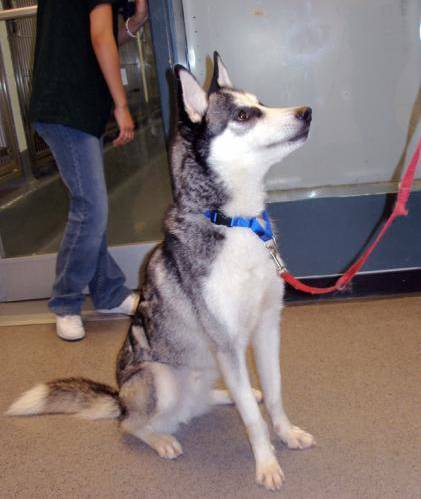

In [44]:
from PIL import Image
img = Image.open("/kaggle/input/dogs-cats-images/dataset/test_set/dogs/dog.4001.jpg") #To make your own prediction replace the path of the image with yours
img

In [45]:
transform = transforms.ToTensor()
img_t = transform(img)

In [46]:
batch_t = torch.unsqueeze(img_t, 0)
model.eval()
out = model(batch_t)
out

tensor([[-2.6785e+00, -8.0915e-01, -1.4840e+00, -1.6998e+00, -1.0272e+00,
          6.5116e-01, -1.7302e+00, -1.2278e+00, -1.4887e+00, -1.2022e+00,
         -1.4517e+00, -2.3876e+00, -2.2879e+00, -1.1511e+00, -2.9395e+00,
         -2.5483e+00, -1.4870e+00, -1.2902e+00, -1.9795e+00, -1.2318e+00,
         -2.6841e+00, -1.8517e+00, -2.1488e+00, -4.2250e-01, -2.4593e+00,
         -1.8402e+00, -1.8291e+00, -2.3537e+00, -1.3523e+00,  2.6833e-01,
         -1.4440e+00, -1.2964e+00, -1.0049e+00, -4.1159e-01,  3.1972e-01,
         -1.3965e+00, -3.5001e-01, -1.9807e+00, -3.0033e-01, -1.9696e+00,
         -1.8262e+00, -1.6299e+00,  2.9602e-01, -5.4789e-01, -1.4656e+00,
         -2.9337e-01, -1.1590e+00, -5.6467e-03, -2.1238e+00, -2.2384e+00,
         -1.7646e+00,  1.0396e+00, -1.2363e+00, -2.6216e+00, -8.1022e-01,
         -2.4523e+00, -1.3657e+00, -2.4249e+00, -1.4905e+00, -1.0170e+00,
         -2.8616e-01, -1.2776e+00, -1.3798e+00, -7.7902e-01, -8.2129e-01,
         -1.6723e+00,  2.5857e-01, -1.

# Make prediction

In [47]:
import requests

url = "https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt" #download the classes file
response = requests.get(url)
labels = response.content.decode("utf-8").splitlines()


index = torch.max(out, 1)[1]

percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
labels[index[0]], percentage[index[0]].item()

('Siberian husky', 26.888212203979492)